In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# 塩や砂糖を使ったレシピの割合(変化しにくい)を求め、オリーブオイルと比較する

In [2]:
col_names = ["ID", "ingredient"]
year = []
for i in range(1998, 2015):
    year.append(i)

In [7]:
def salt(col_names, year):
    """
    各年のオリーブオイルを使ったレシピの割合とその標準誤差を取得する。
    """

    ratio = []
    se = []
    total_recipe = []
    total_user = []
    bar = tqdm(total=len(year)*3)
    for i in year:
        df = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/3S1/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv", names=col_names, usecols=[0, 1])
        bar.update(1)
        n = len(pd.unique(df['ID']))
        df["ingredient"] = df["ingredient"].fillna("non_data")
        count = 0
        for j in range(len(df)):
            if ("塩" in df["ingredient"][j]) or ("しお" in df["ingredient"][j]):
                count += 1
        bar.update(1)
        p = count / n
        total_recipe.append(count)
        total_user.append(n)
        ratio.append(p)
        se.append(np.sqrt(p*(1-p)/n))
        bar.update(1)
    return ratio, se, total_recipe, total_user

def suger(col_names, year):
    """
    各年のオリーブオイルを使ったレシピの割合とその標準誤差を取得する。
    """

    ratio = []
    se = []
    total_recipe = []
    total_user = []
    bar = tqdm(total=len(year)*3)
    for i in year:
        df = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/3S1/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv", names=col_names, usecols=[0, 1])
        bar.update(1)
        n = len(pd.unique(df['ID']))
        df["ingredient"] = df["ingredient"].fillna("non_data")
        count = 0
        for j in range(len(df)):
            if ("砂糖" in df["ingredient"][j]) or ("サトウ" in df["ingredient"][j]) or ("さとう" in df["ingredient"][j]):
                count += 1
        bar.update(1)
        p = count / n
        total_recipe.append(count)
        total_user.append(n)
        ratio.append(p)
        se.append(np.sqrt(p*(1-p)/n))
        bar.update(1)
    return ratio, se, total_recipe, total_user

In [10]:
ratio_salt, se_salt, total_recipe_salt, total_user_salt = salt(col_names, year)

 98%|█████████▊| 50/51 [09:20<00:43, 43.81s/it]

In [8]:
ratio_suger, se_suger, total_recipe_suger, total_user_suger = suger(col_names, year)

 98%|█████████▊| 50/51 [11:44<00:55, 55.91s/it]

In [11]:
total_user_adjusted_salt = [n/(max(total_user_salt)/0.5) for n in total_user_salt]

In [9]:
total_user_adjusted_suger = [n/(max(total_user_suger)/0.5) for n in total_user_suger]

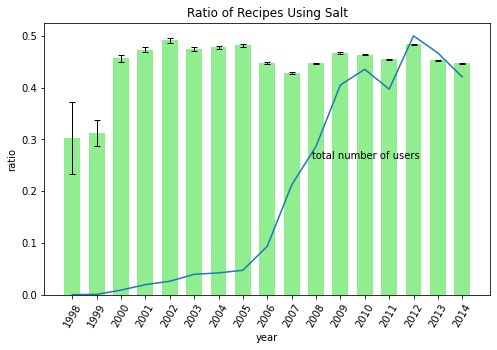

In [15]:
error_bar_set = dict(lw = 1, capthick = 1, capsize = 3)
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot(year, total_user_adjusted_salt)
ax.bar(year, ratio_salt, color="lightgreen",tick_label=year, yerr=se_salt, ecolor="black", error_kw=error_bar_set, width=0.65)
ax.set_xticklabels(year, rotation=60)
ax.set_title("Ratio of Recipes Using Salt")
ax.text(0.60, 0.50, "total number of users", size = 10, transform=ax.transAxes)
ax.set_xlabel("year")
ax.set_ylabel("ratio")
plt.savefig("mokomichi_2.png")

Text(0, 0.5, 'ratio')

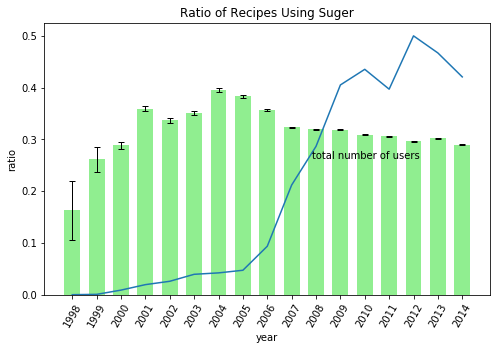

In [10]:
error_bar_set = dict(lw = 1, capthick = 1, capsize = 3)
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot(year, total_user_adjusted_suger)
ax.bar(year, ratio_suger, color="lightgreen",tick_label=year, yerr=se_suger, ecolor="black", error_kw=error_bar_set, width=0.65)
ax.set_xticklabels(year, rotation=60)
ax.set_title("Ratio of Recipes Using Suger")
ax.text(0.60, 0.50, "total number of users", size = 10, transform=ax.transAxes)
ax.set_xlabel("year")
ax.set_ylabel("ratio")